In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
conflicts_data = "Data_Files/ged191.xlsx"

In [3]:
#Read CSV file
conflicts_data = pd.read_csv('Data_Files/ged191.xlsx')


In [4]:
conflicts_data.head()

,id,year,active_year,type_of_violence,conflict_new_id,conflict_name,dyad_new_id,dyad_name,side_a_new_id,gwnoa,...,date_prec,date_start,date_end,deaths_a,deaths_b,deaths_civilians,deaths_unknown,low,best,high
0,67972,2013,1,1,11347,Mali: Government,12571,Government of Mali - MUJAO,72,432.0,...,2,2013-01-11,2013-01-12,12,16,3,0,31,31,50
1,23385,2004,1,3,583,FNI - Civilians,1050,FNI - Civilians,606,NaN,...,2,2004-01-14,2004-01-16,0,0,200,0,100,200,200
2,24255,2007,0,2,4600,CNDP - PARECO,5210,CNDP - PARECO,426,NaN,...,2,2007-12-13,2007-12-18,0,0,4,0,4,4,4
3,82612,2008,1,1,364,India: Kashmir,792,Government of India - Kashmir insurgents,141,750.0,...,2,2008-03-04,2008-03-05,0,2,0,0,2,2,2
4,82645,2008,1,1,364,India: Kashmir,792,Government of India - Kashmir insurgents,141,750.0,...,2,2008-06-30,2008-07-01,1,11,0,0,12,12,12


In [6]:
df = conflicts_data[['year','country','region', 'best']]
df

,year,country,region,best
0,2013,Mali,Africa,31
1,2004,DR Congo (Zaire),Africa,200
2,2007,DR Congo (Zaire),Africa,4
3,2008,India,Asia,2
4,2008,India,Asia,12
...,...,...,...,...
152611,2018,Afghanistan,Asia,11
152612,2018,Afghanistan,Asia,10
152613,2018,Afghanistan,Asia,8
152614,2018,Afghanistan,Asia,0


In [ ]:
# how many deaths occured in each of the countries within the Middle East and Asia regions
# for each individual year between 1989 and 2018. 
# 1. Use .isin "Region" to retrieve Middle East and Asia
# 2. use .loc to find rows in the best column with at least 200 deaths

In [7]:
df= df[df['region'].isin(["Asia","Middle East"])]
df1=df[['year','country','best']]
df2 = df1.sort_values('year')
df2 =df2.loc[df['best'] >199] #200
df2.head(20)
# The 18 countries in the Middle East and Asia regions
# with incident(s) of fatlaties of 200+ in any year between 1989-2018
#average amount of deaths within the +200 limit
#average amount of deaths per conflict and year

,year,country,best
6525,1989,Afghanistan,257
6503,1989,Afghanistan,300
6502,1989,Afghanistan,429
2225,1989,Myanmar (Burma),220
6254,1989,Afghanistan,600
6113,1989,India,805
27883,1989,India,209
22699,1989,China,2600
27788,1989,Cambodia (Kampuchea),300
16884,1989,Afghanistan,222


In [8]:
new_df2 = df2.groupby(['country','year']).best.mean().to_frame().reset_index()
new_df2.head(40)

,country,year,best
0,Afghanistan,1989,301.000000
1,Afghanistan,1990,327.500000
2,Afghanistan,1991,568.750000
3,Afghanistan,1992,546.000000
4,Afghanistan,1993,390.000000
5,Afghanistan,1994,959.166667
6,Afghanistan,1995,320.375000
7,Afghanistan,1996,200.000000
8,Afghanistan,1997,768.800000
9,Afghanistan,1998,724.272727


In [9]:
new_df2.describe()

,year,best
count,82.000000,82.000000
mean,1999.500000,555.296231
std,8.933568,498.715964
min,1989.000000,200.000000
25%,1992.000000,271.000000
50%,1996.500000,339.500000
75%,2006.000000,671.125000
max,2018.000000,2600.000000


In [ ]:
#Why Seaborn?
# Seaborn is a Python data visualization library based on Matplotlib.
# Seaborn provides a high-level interface for creating attractive graphs. #Why Boxplots?

In [ ]:
# Boxplots show the three quartile values of distribution along with extreme values.
# The “whiskers” extend to points that lie within 1.5 IQRs of the lower and upper quartile.
# Observations that fall outside this range are displayed independently.
# This means that each value in the boxplot corresponds to an actual observation in the data.

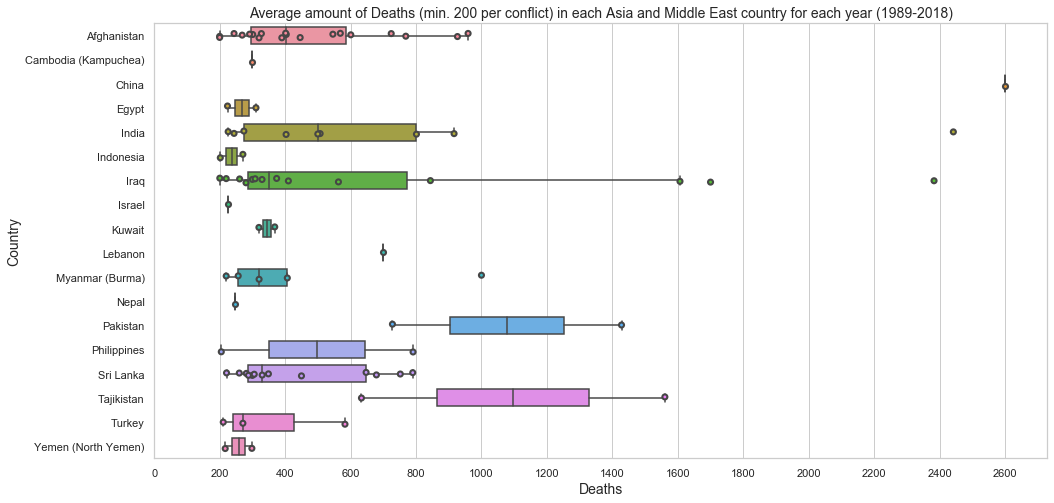

In [10]:
#average amount of deaths
sns.set(style="whitegrid", palette="muted")
ax = plt.subplots(figsize=(16, 8))
sns.boxplot(x='best', y='country', data=new_df2, orient='h', fliersize=0, saturation=0.75, whis=1.8, width=0.7)
# Add in points to show the raw data more clearly
sns.stripplot(x='best', y='country', data=new_df2,
             jitter=True, split=True, size=5, linewidth=2.1)
plt.title('Average amount of Deaths (min. 200 per conflict) in each Asia and Middle East country for each year (1989-2018)',fontname='Arial',fontsize=14)
plt.ylabel('Country',fontname='Arial',fontsize=14)
plt.xlabel('Deaths',fontname='Arial', fontsize=14)
x = [0,2600]
plt.xticks(np.arange(min(x), max(x)+1, 200))


plt.savefig("Boxplot.png")


plt.show()




In [11]:
df3 = new_df2.pivot_table(index='year', columns='country',aggfunc=np.sum).fillna(0)
df3

best                                                   \
country Afghanistan Cambodia (Kampuchea)   China  Egypt        India   
year                                                                   
1989     301.000000                300.0  2600.0    0.0   507.000000   
1990     327.500000                  0.0     0.0    0.0   916.333333   
1991     568.750000                  0.0     0.0    0.0  2442.000000   
1992     546.000000                  0.0     0.0    0.0   801.333333   
1993     390.000000                  0.0     0.0    0.0   274.000000   
1994     959.166667                  0.0     0.0    0.0     0.000000   
1995     320.375000                  0.0     0.0    0.0     0.000000   
1996     200.000000                  0.0     0.0    0.0   226.000000   
1997     768.800000                  0.0     0.0    0.0     0.000000   
1998     724.272727                  0.0     0.0    0.0     0.000000   
1999     403.500000                  0.0     0.0    0.0   244.000000   
2000     401.714286                  0.0     0.0    0.0   403.000000   
2001     268.833333                  0.0     0.0    0.0   500.000000   
2002     200.000000                  0.0     0.0    0.0     0.000000   
2003       0.000000                  0.0     0.0    0.0     0.000000   
2004       0.000000                  0.0     0.0    0.0     0.000000   
2006       0.000000                  0.0     0.0    0.0     0.000000   
2007       0.000000                  0.0     0.0    0.0     0.000000   
2008       0.000000                  0.0     0.0    0.0     0.000000   
2009       0.000000                  0.0     0.0    0.0     0.000000   
2010       0.000000                  0.0     0.0    0.0     0.000000   
2012     244.000000                  0.0     0.0    0.0     0.000000   
2013     291.500000                  0.0     0.0    0.0     0.000000   
2014     926.666667                  0.0     0.0    0.0     0.000000   
2015     600.750000                  0.0     0.0  224.0     0.000000   
2016       0.000000                  0.0     0.0    0.0     0.000000   
2017       0.000000                  0.0     0.0  311.0     0.000000   
2018     446.000000                  0.0     0.0    0.0     0.000000   

                                                                           \
country Indonesia         Iraq Israel      Kuwait Lebanon Myanmar (Burma)   
year                                                                        
1989          0.0     0.000000    0.0    0.000000     0.0      220.000000   
1990          0.0     0.000000    0.0  368.333333   700.0        0.000000   
1991        271.0  1606.642857    0.0  320.000000     0.0      256.666667   
1992          0.0   220.000000    0.0    0.000000     0.0      320.500000   
1993          0.0     0.000000    0.0    0.000000     0.0        0.000000   
1994          0.0   261.000000    0.0    0.000000     0.0        0.000000   
1995          0.0   200.500000    0.0    0.000000     0.0     1000.000000   
1996          0.0   300.000000    0.0    0.000000     0.0        0.000000   
1997          0.0   844.000000    0.0    0.000000     0.0        0.000000   
1998          0.0     0.000000    0.0    0.000000     0.0        0.000000   
1999          0.0     0.000000    0.0    0.000000     0.0        0.000000   
2000          0.0     0.000000    0.0    0.000000     0.0        0.000000   
2001          0.0     0.000000    0.0    0.000000     0.0        0.000000   
2002        202.0     0.000000    0.0    0.000000     0.0        0.000000   
2003          0.0  2383.000000    0.0    0.000000     0.0        0.000000   
2004          0.0   563.000000    0.0    0.000000     0.0        0.000000   
2006          0.0  1700.000000    0.0    0.000000     0.0        0.000000   
2007          0.0   410.000000    0.0    0.000000     0.0        0.000000   
2008          0.0     0.000000  225.0    0.000000     0.0        0.000000   
2009          0.0     0.000000    0.0    0.000000     0.0        0.000000   
2010       

In [ ]:
#Line graphs of the 5 regions total deaths by year with and without 1994 Rwanda data


In [12]:
df4=conflicts_data[['region','year','best']]
df4=df4.sort_values('year')
df5=df4.rename(columns = {'region':'Region'})
df5

,Region,year,best
22958,Asia,1989,2
6437,Americas,1989,5
6438,Americas,1989,1
6441,Americas,1989,1
6442,Americas,1989,1
...,...,...,...
146615,Asia,2018,2
146616,Asia,2018,2
146617,Asia,2018,2
146611,Africa,2018,3


In [13]:
#Groupby region and year to sum up totals
df6= df5.groupby(['Region', 'year']).best.sum().to_frame().reset_index()
df6.head(10)

,Region,year,best
0,Africa,1989,40608
1,Africa,1990,72855
2,Africa,1991,33948
3,Africa,1992,18883
4,Africa,1993,30725
5,Africa,1994,520514
6,Africa,1995,19359
7,Africa,1996,48780
8,Africa,1997,41979
9,Africa,1998,35980


In [14]:
#Sans Rwanda
#find Africa 1994 and deduct the Rwanda total (found amount manually)
#df6.loc[5].at['best']-501961
df6.set_value(5, 'best', 18553)
df6.head(10)

,Region,year,best
0,Africa,1989,40608
1,Africa,1990,72855
2,Africa,1991,33948
3,Africa,1992,18883
4,Africa,1993,30725
5,Africa,1994,18553
6,Africa,1995,19359
7,Africa,1996,48780
8,Africa,1997,41979
9,Africa,1998,35980


In [15]:
#With Rwanda
df7=df5.groupby(['Region', 'year']).best.sum().to_frame().reset_index()
df7.head(10)

,Region,year,best
0,Africa,1989,40608
1,Africa,1990,72855
2,Africa,1991,33948
3,Africa,1992,18883
4,Africa,1993,30725
5,Africa,1994,520514
6,Africa,1995,19359
7,Africa,1996,48780
8,Africa,1997,41979
9,Africa,1998,35980


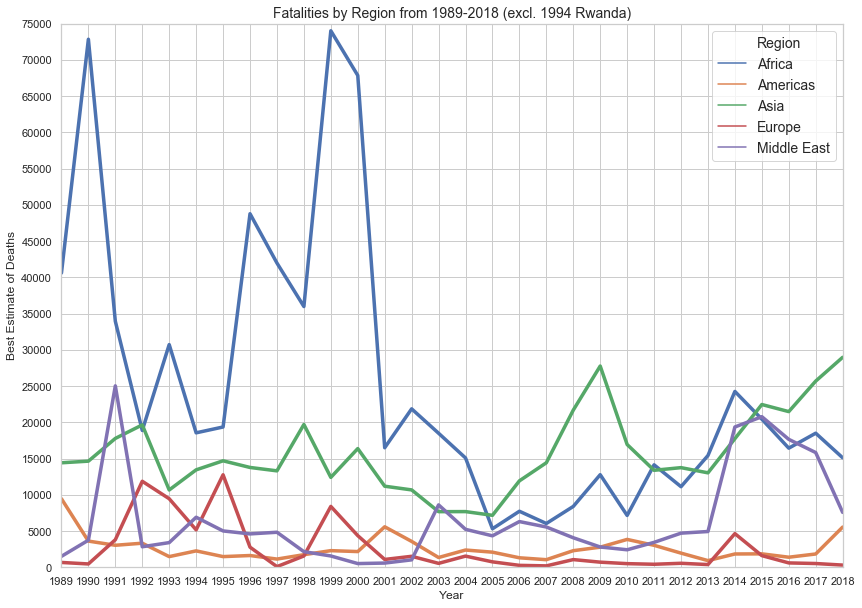

In [16]:
#sans Rwanda
sns.set(style="whitegrid")
ax = plt.subplots(figsize=(14, 10))
plt.title('Fatalities by Region from 1989-2018 (excl. 1994 Rwanda)',fontname='Arial',fontsize=14)
sns.lineplot(x="year", y="best",hue="Region", data=df6, linewidth=3.5)
plt.ylabel('Best Estimate of Deaths',fontname='Arial',fontsize=12)
plt.xlabel('Year',fontname='Arial', fontsize=12)
plt.ylim(bottom=0)
x = [1989, 2018]
y = [0,75000]
plt.xticks(np.arange(min(x), max(x)+1))
plt.yticks(np.arange(min(y), max(y)+1, 5000))
plt.xlim(1989, 2018)
plt.ylim(0,75000)
plt.legend(loc=1, prop={'size':14})

plt.savefig("Fatalities by Region from 1989-2018 (excl. 1994 Rwanda).png")

plt.show()
#America, Europe less volatile over time
#Less deaths overall over time
#Africa downward trend after periods of instability
#Asia upward trend

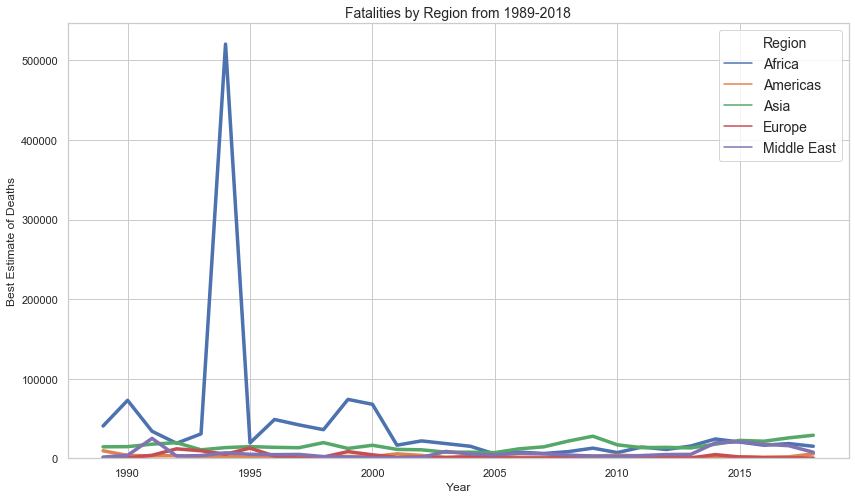

In [17]:
sns.set(style="whitegrid")
ax = plt.subplots(figsize=(14, 8))
plt.title('Fatalities by Region from 1989-2018',fontname='Arial',fontsize=14)
sns.lineplot(x="year", y="best",hue="Region", data=df7, linewidth=3.5)
plt.ylabel('Best Estimate of Deaths',fontname='Arial',fontsize=12)
plt.xlabel('Year',fontname='Arial', fontsize=12)
plt.ylim(bottom=0)
plt.legend(loc=1, prop={'size':14})

plt.savefig("Fatalities by Region from 1989-2018.png")


plt.show()